## Analisis exploratorio - SF Bay Area Bike Share

In [1]:
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15,5)

In [3]:
trips = pd.read_csv('trip.csv', low_memory=False)

trips.columns.values

print(trips.shape)

print(trips.isnull().any())

print(trips.describe())

(669959, 11)
id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool
                  id      duration  start_station_id  end_station_id  \
count  669959.000000  6.699590e+05     669959.000000   669959.000000   
mean   460382.009899  1.107950e+03         57.851876       57.837438   
std    264584.458487  2.225544e+04         17.112474       17.200142   
min      4069.000000  6.000000e+01          2.000000        2.000000   
25%    231082.500000  3.440000e+02         50.000000       50.000000   
50%    459274.000000  5.170000e+02         62.000000       62.000000   
75%    692601.000000  7.550000e+02         70.000000       70.000000   
max    913460.000000  1.727040e+07         84.000000       84.000000   

             bike_

In [4]:
trips.start_date = pd.to_datetime(trips.start_date, format='%m/%d/%Y %H:%M')
trips.end_date = pd.to_datetime(trips.end_date, format='%m/%d/%Y %H:%M')

trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
dtype: object

In [5]:
trips_con_fecha = trips

# hago un split de la fecha y la hora
trips_con_fecha['year'] = pd.DatetimeIndex(trips_con_fecha['start_date']).year
trips_con_fecha['month'] = pd.DatetimeIndex(trips_con_fecha['start_date']).month
trips_con_fecha['day'] = pd.DatetimeIndex(trips_con_fecha['start_date']).day
trips_con_fecha['hour'] = pd.DatetimeIndex(trips_con_fecha['start_date']).hour
trips_con_fecha['minutes'] = pd.DatetimeIndex(trips_con_fecha['start_date']).minute

## Cantidad de trips por año

<IPython.core.display.Javascript object>


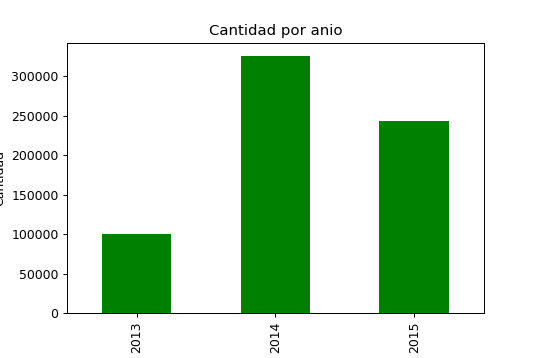

In [12]:
%matplotlib notebook
tri=trips_con_fecha.groupby(by='year').count()['id']
#tri=trips_con_fecha['anio'].value_counts().describe()
ax1=tri.plot(kind='bar',title='Cantidad por anio',color='green')
ax1.set_ylabel('Cantidad')
ax1.set_xlabel('Anio')


## Cantidad por dia de la semana

<IPython.core.display.Javascript object>


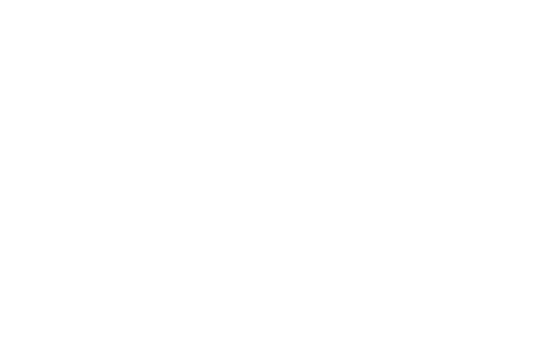

In [7]:
%matplotlib notebook
trips_con_fecha['day']= trips_con_fecha['start_date'].dt.dayofweek
tri=trips_con_fecha.groupby(by='day').count()['id']
#tri=trips_con_fecha['dia'].value_counts()
ax2=tri.plot(kind='bar',title='Cantidad por dia de la semana',color='green')
ax2.set_ylabel('Cantidad')
ax2.set_xlabel('Dia')

## Cantidad por tipo de suscripcion

<IPython.core.display.Javascript object>


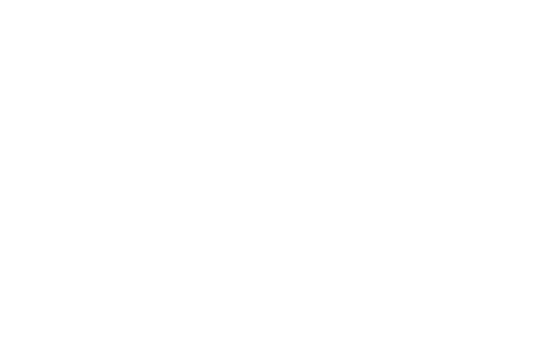

In [8]:
# Cantidad total de cada suscripcion
%matplotlib notebook
sub=trips_con_fecha['subscription_type'].value_counts()
su=sub.plot(kind='bar',title='Cantidad por suscripcion',fontsize= 8, color='green')
su.set_xlabel('Tipo de Suscripcion')
su.set_ylabel('Cantidad')

## Cantidad de bicicletas alquiladas por hora

<IPython.core.display.Javascript object>


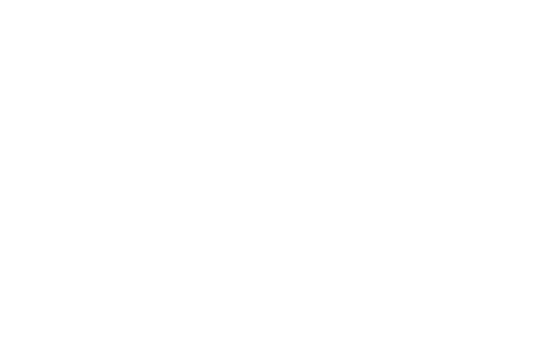

In [9]:
%matplotlib notebook
#sub=trips_con_fecha['hora'].value_counts()
sub=trips_con_fecha.groupby(by='hour').count()['id']
su2=sub.plot(kind='bar',title='Cantidad por hora',color='green')
su2.set_xlabel('Hora')
su2.set_ylabel('Cantidad')

## Duraciones en minutos (estoy teniendo problemas con los bins!!!)

<IPython.core.display.Javascript object>


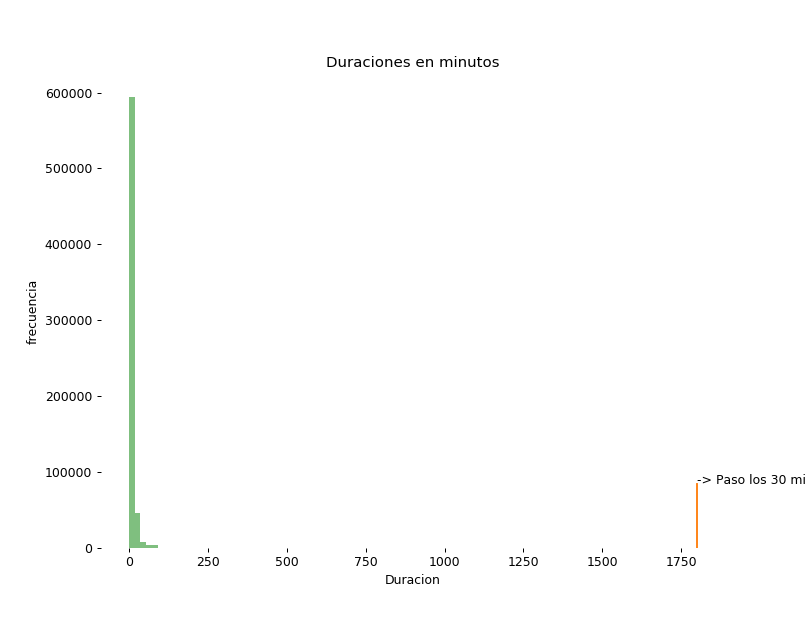

In [54]:
%matplotlib notebook
trips_con_fecha['duration_minutes']=trips_con_fecha['duration']/60

plt.figure(figsize = [9,7])
h = plt.hist(trips_con_fecha['duration_minutes'].values,range = [0,90],alpha = .5,bins=5,facecolor='green')
plt.plot([1800,1800],[0,float(trips_con_fecha.shape[0]/8)],linestyle = '-')
plt.text(1800,float(trips_con_fecha.shape[0]/8),'-> Paso los 30 minutos')
plt.title('Duraciones en minutos')
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xlabel('Duracion')
plt.ylabel('frecuencia')
plt.legend()

## Porcentaje de bicicletas sacadas que no cumplieron el maximo de 30 minutos

In [13]:
val=trips_con_fecha.loc[trips_con_fecha['duration'] > 1800,:]['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)

5.23539500178


## Porcentaje de bicicletas sacadas que no cumplieron el maximo de 30 minutos para 24-hour or 3-day membership

In [14]:
val=trips_con_fecha.loc[(trips_con_fecha['duration'] > 1800) & (trips_con_fecha['subscription_type'] == 'Customer'),:]\
                        ['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)

4.66700201057


## Porcentaje de bicis sacadas que no cumplieron el maximo de 30 minutos para annual membership

In [15]:
val=trips_con_fecha.loc[(trips_con_fecha['duration'] > 1800) & (trips_con_fecha['subscription_type'] == 'Subscriber'),:]\
                        ['duration'].count()/float(trips_con_fecha['duration'].count())   
print(val*100)

0.568392991213


## Ratio: cantidad de bicis devueltas/cantidad de bici alquiladas en una estacion

In [16]:
# Cantidad total de trips que salieron de cada estacion
estacion_count=trips_con_fecha['start_station_name'].value_counts()
ES=trips_con_fecha.loc[trips_con_fecha['start_station_name']==trips_con_fecha['end_station_name'],:]
trips_con_mismaE=ES['start_station_name'].value_counts()
ratioMISMAES=trips_con_mismaE/ estacion_count
top20=ratioMISMAES.sort_values(ascending=False)[:20]
top20

University and Emerson                   0.591270
San Mateo County Center                  0.292683
Redwood City Public Library              0.253521
San Jose Civic Center                    0.245295
Broadway at Main                         0.238806
California Ave Caltrain Station          0.207602
Palo Alto Caltrain Station               0.187589
Franklin at Maple                        0.169643
Arena Green / SAP Center                 0.145722
Rengstorff Avenue / California Street    0.141718
Cowper at University                     0.122999
Japantown                                0.120419
Park at Olive                            0.120000
Stanford in Redwood City                 0.112385
Evelyn Park and Ride                     0.107978
Mezes Park                               0.105572
Redwood City Caltrain Station            0.099743
San Jose City Hall                       0.095696
San Salvador at 1st                      0.094563
SJSU 4th at San Carlos                   0.094017


## Top 20 de las estaciones desde las cuales salen mas bicicletas

<IPython.core.display.Javascript object>


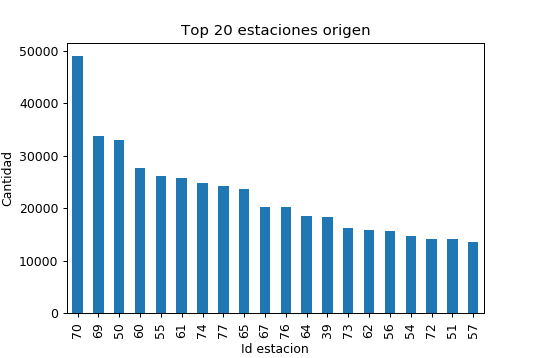

In [17]:
%matplotlib notebook

count_start_station = trips['start_station_id'].value_counts()
count_start_station

css = count_start_station[:20].plot('bar', title = 'Top 20 estaciones origen')
css.set_ylabel('Cantidad')
css.set_xlabel('Id estacion')

## Top 20 de las estaciones a las cuales llegan más bicicletas

<IPython.core.display.Javascript object>


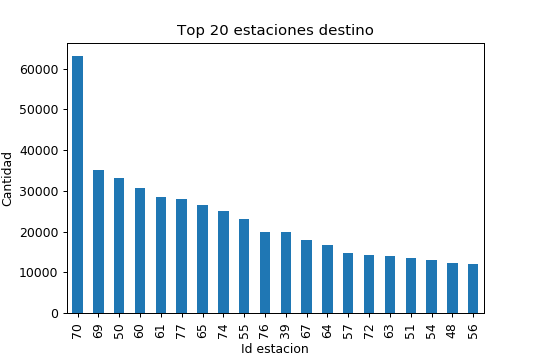

In [18]:
%matplotlib notebook

count_end_station = trips['end_station_id'].value_counts()
count_end_station

ces = count_end_station[:20].plot('bar', title = 'Top 20 estaciones destino' )
ces.set_ylabel('Cantidad')
ces.set_xlabel('Id estacion')

## Las 10 estaciones con mas bicicletas de salida (de lunes a viernes)

In [19]:
#top_salidas_semana=trips_con_fecha[['date','start_station_name']]
# Los dias van de 0 a 6
semana=trips_con_fecha.loc[(trips_con_fecha['day']== 0) | (trips_con_fecha['day']== 1) |(trips_con_fecha['day']== 2) | (trips_con_fecha['day']== 3)| (trips_con_fecha['day']== 4),:]
semana_stats=semana['start_station_name'].value_counts()

In [20]:
top10_salida_lu_vie=semana_stats.sort_values(ascending=False)[:10]
top10_salida_lu_vie

San Francisco Caltrain (Townsend at 4th)         46234
San Francisco Caltrain 2 (330 Townsend)          31706
Harry Bridges Plaza (Ferry Building)             26520
Temporary Transbay Terminal (Howard at Beale)    25084
2nd at Townsend                                  22723
Steuart at Market                                22594
Market at Sansome                                21932
Townsend at 7th                                  21655
Embarcadero at Sansome                           21094
Market at 10th                                   17968
Name: start_station_name, dtype: int64

## Las 10 estaciones con menos bicicletas de salida (de lunes a viernes)

In [21]:
top10_lu_vie=semana_stats.sort_values(ascending=True)[:10]
top10_lu_vie

San Jose Government Center          22
Broadway at Main                    52
Franklin at Maple                  148
Redwood City Public Library        157
San Mateo County Center            258
Mezes Park                         287
Redwood City Medical Center        294
Stanford in Redwood City           416
Park at Olive                      574
California Ave Caltrain Station    701
Name: start_station_name, dtype: int64

## Las 10 estaciones con mas bicicletas de salida (sabado y domingo)

In [22]:
finde=trips_con_fecha.loc[(trips_con_fecha['day']==5) | (trips_con_fecha['day']==6),:]
finde_stats=finde['start_station_name'].value_counts()
top10=finde_stats.sort_values(ascending=False)[:10]
top10

Embarcadero at Sansome                      6619
Harry Bridges Plaza (Ferry Building)        6414
Market at 4th                               3486
Embarcadero at Bryant                       3227
2nd at Townsend                             3114
Powell Street BART                          2990
Grant Avenue at Columbus Avenue             2864
San Francisco Caltrain (Townsend at 4th)    2858
Powell at Post (Union Square)               2357
Market at 10th                              2304
Name: start_station_name, dtype: int64

## Las 10 estaciones con menos bicicletas de salida (sabado y domingo)

In [23]:
top10_Sab_Dom=finde_stats.sort_values(ascending=True)[:10]
top10_Sab_Dom

San Jose Government Center           1
Broadway at Main                    15
Redwood City Medical Center         17
Stanford in Redwood City            20
San Mateo County Center             29
Mezes Park                          54
Redwood City Public Library         56
Santa Clara County Civic Center     66
Franklin at Maple                   76
Adobe on Almaden                   115
Name: start_station_name, dtype: int64

## Top 15 viajes más comunes según origen y destino

/usr/local/lib/python2.7/dist-packages/pandas-0.19.2-py2.7-linux-x86_64.egg/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


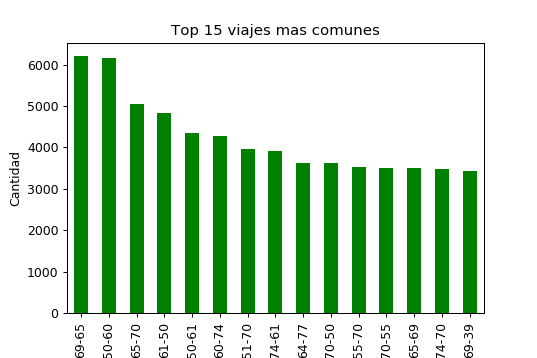

In [24]:
%matplotlib notebook

common_trips = trips[['start_station_id','end_station_id']]

common_trips.start_station_id = common_trips.start_station_id.astype(str)
common_trips.end_station_id = common_trips.end_station_id.astype(str)

common_trips['start_end'] = (common_trips.start_station_id + '-' + common_trips.end_station_id)

aux = common_trips['start_end'].value_counts()
ct = aux[:15].plot(kind='bar',title='Top 15 viajes mas comunes',color='green')
ct.set_ylabel('Cantidad')
ct.set_xlabel('Origen - Destino')

## Las 10 estaciones mas populares de salida de dia laboral en horario pico(7 a 9 y 16 a 18)

In [25]:
trips_con_fecha['yearE'] = pd.DatetimeIndex(trips_con_fecha['end_date']).year
trips_con_fecha['monthE'] = pd.DatetimeIndex(trips_con_fecha['end_date']).month
trips_con_fecha['dayE'] = pd.DatetimeIndex(trips_con_fecha['end_date']).day
trips_con_fecha['hourE'] = pd.DatetimeIndex(trips_con_fecha['end_date']).hour
trips_con_fecha['minutesE'] = pd.DatetimeIndex(trips_con_fecha['end_date']).minute

semana_hora_pico=trips_con_fecha.loc[((trips_con_fecha['hourE']>= 7 )& (trips_con_fecha['hourE']<=9)) |((trips_con_fecha['hourE']>= 16) & \
                    (trips_con_fecha['hourE']<=18)),:]

estacionesHorarioPico=semana_hora_pico['start_station_name'].value_counts()
top10estacionesHorarioPico=estacionesHorarioPico.sort_values(ascending=False)[:10]
top10estacionesHorarioPico


San Francisco Caltrain (Townsend at 4th)         35048
San Francisco Caltrain 2 (330 Townsend)          23234
Temporary Transbay Terminal (Howard at Beale)    19259
Harry Bridges Plaza (Ferry Building)             18970
Steuart at Market                                16249
2nd at Townsend                                  15842
Townsend at 7th                                  14386
Embarcadero at Sansome                           14137
Market at Sansome                                12976
Market at 10th                                   11840
Name: start_station_name, dtype: int64

## Las 10 viajes mas populares de dia de semana en horario pico(7 a 9 y 16 a 18)

In [26]:
viajesPopulares = semana_hora_pico[['start_station_name','end_station_name','id']].groupby(['start_station_name','end_station_name'])['id'].count()
top20=viajesPopulares.sort_values(ascending=False)[:10]
top20

start_station_name                             end_station_name                        
San Francisco Caltrain 2 (330 Townsend)        Townsend at 7th                             3658
2nd at Townsend                                Harry Bridges Plaza (Ferry Building)        3264
Harry Bridges Plaza (Ferry Building)           2nd at Townsend                             3243
Embarcadero at Folsom                          San Francisco Caltrain (Townsend at 4th)    3191
Townsend at 7th                                San Francisco Caltrain (Townsend at 4th)    3182
Embarcadero at Sansome                         Steuart at Market                           3093
Harry Bridges Plaza (Ferry Building)           Embarcadero at Sansome                      3075
Steuart at Market                              2nd at Townsend                             2945
Temporary Transbay Terminal (Howard at Beale)  San Francisco Caltrain (Townsend at 4th)    2920
Steuart at Market                              S

## Top10 de viajes con mayor promedio de duracion, de dia de semana y en horario pico

In [27]:
info_viajes_Populares = semana_hora_pico[['start_station_name','end_station_name','duration']].groupby(['start_station_name','end_station_name'])['duration'].agg([np.size,np.mean,np.std])
info_viajes_Populares.loc[info_viajes_Populares['size']>2000,:].sort_values('mean',ascending=False).head(10)

size  \
start_station_name                            end_station_name                                      
Harry Bridges Plaza (Ferry Building)          Embarcadero at Sansome                         3075   
                                              San Francisco Caltrain (Townsend at 4th)       2182   
San Francisco Caltrain (Townsend at 4th)      Market at Sansome                              2039   
Market at 10th                                San Francisco Caltrain (Townsend at 4th)       2535   
San Francisco Caltrain (Townsend at 4th)      Harry Bridges Plaza (Ferry Building)           2681   
                                              Temporary Transbay Terminal (Howard at Beale)  2599   
Steuart at Market                             San Francisco Caltrain (Townsend at 4th)       2709   
Embarcadero at Folsom                         San Francisco Caltrain (Townsend at 4th)       3191   
San Francisco Caltrain (Townsend at 4th)      Steuart at Market                              2357   
Temporary Transbay Terminal (Howard at Beale) San Francisco Caltrain (Townsend at 4th)       2920   

                                                                                                    mean  \
start_station_name                            end_station_name                                             
Harry Bridges Plaza (Ferry Building)          Embarcadero at Sansome                         1063.781138   
                                              San Francisco Caltrain (Townsend at 4th)        831.148029   
San Francisco Caltrain (Townsend at 4th)      Market at Sansome                               823.132908   
Market at 10th                                San Francisco Caltrain (Townsend at 4th)        786.864300   
San Francisco Caltrain (Townsend at 4th)      Harry Bridges Plaza (Ferry Building)            745.986945   
                                              Temporary Transbay Terminal (Howard at Beale)   726.017314   
Steuart at Market                             San Francisco Caltrain (Townsend at 4th)        725.410853   
Embarcadero at Folsom                         San Francisco Caltrain (Townsend at 4th)        701.274835   
San Francisco Caltrain (Townsend at 4th)      Steuart at Market                               699.029699   
Temporary Transbay Terminal (Howard at Beale) San Francisco Caltrain (Townsend at 4th)        644.416438   

                                                                                                     std  
start_station_name                            end_station_name                                            
Harry Bridges Plaza (Ferry Building)          Embarcadero at Sansome                         2513.807266  
                                              San Francisco Caltrain (Townsend at 4th)        774.523982  
San Francisco Caltrain (Townsend at 4th)      Market at Sansome                              2452.355243  
Market at 10th                                San Francisco Caltrain (Townsend at 4th)       4523.796296  
San Francisco Caltrain (Townsend at 4th)      Harry Bridges Plaza (Ferry Building)           1281.758765  
                                              Temporary Transbay Terminal (Howard at Beale)  1632.042390  
Steuart at Market                             San Francisco Caltrain (Townsend at 4th)       1512.311844  
Embarcadero at Folsom                         San Francisco Caltrain (Townsend at 4th)       2440.397087  
San Francisco Caltrain (Townsend at 4th)      Steuart at Market                               207.878007  
Temporary Transbay Terminal (Howard at Beale) San Francisco Caltrain (Townsend at 4th)        850.007864

## Top10 de viajes de dia de semana y en horario pico con duracion mas variable

In [28]:
info_viajes_Populares.loc[info_viajes_Populares['size']>2000,:].sort_values('std',ascending=False).head(10)

,,size,mean,std
start_station_name,end_station_name,,,
Market at 10th,San Francisco Caltrain (Townsend at 4th),2535,786.864300,4523.796296
Market at Sansome,2nd at South Park,2262,443.255526,2880.419426
Mountain View Caltrain Station,Mountain View City Hall,2085,411.705995,2692.106160
Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3075,1063.781138,2513.807266
San Francisco Caltrain (Townsend at 4th),Market at Sansome,2039,823.132908,2452.355243
Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),3191,701.274835,2440.397087
Steuart at Market,Embarcadero at Sansome,2025,632.006420,1707.484570
San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),2599,726.017314,1632.042390
Steuart at Market,San Francisco Caltrain (Townsend at 4th),2709,725.410853,1512.311844


## Los 10 viajes mas populares de fin de semana

In [29]:
weekend=trips_con_fecha.loc[(trips_con_fecha['day']== 5) | (trips_con_fecha['day']== 6),: ]
weekend_popular_trips = weekend[['start_station_name','end_station_name','id']].groupby(['start_station_name','end_station_name'])['id'].count()
top10weekend=weekend_popular_trips.sort_values(ascending=False)[:10]
top10weekend

start_station_name                    end_station_name                    
Harry Bridges Plaza (Ferry Building)  Embarcadero at Sansome                  1550
Embarcadero at Sansome                Harry Bridges Plaza (Ferry Building)     907
                                      Embarcadero at Sansome                   873
Harry Bridges Plaza (Ferry Building)  Harry Bridges Plaza (Ferry Building)     841
Embarcadero at Bryant                 Embarcadero at Sansome                   483
                                      Harry Bridges Plaza (Ferry Building)     459
Embarcadero at Vallejo                Embarcadero at Sansome                   451
University and Emerson                University and Emerson                   448
2nd at Townsend                       Harry Bridges Plaza (Ferry Building)     415
Powell Street BART                    Market at 10th                           412
Name: id, dtype: int64

##  weather

# Dates with more temperature:

In [94]:
chunks2=pd.read_csv('weather.csv',sep=',',iterator=True,chunksize=3000)
weather = pd.concat([chunk for chunk in chunks2])

weather.loc[weather['events'] == 'rain', 'events'] = "Rain"
weather.loc[weather['events'].isnull(), 'events'] = "None"

weather2=weather
print('El valor máximo de temperatura es:')
print(weather['max_temperature_f'].max())

El valor máximo de temperatura es:
102.0


In [95]:
max_temp_weather = weather.groupby(['max_temperature_f'], sort=True)['date'].max()
max_temp_weather = max_temp_weather.reset_index()
max_temp_weather.tail()

,max_temperature_f,date
50,95.0,9/7/2013
51,97.0,8/16/2015
52,98.0,8/16/2015
53,99.0,4/30/2015
54,102.0,7/27/2015


In [96]:
indexed_max_temp_weather = max_temp_weather.set_index(max_temp_weather['date'])
indexed_max_temp_weather.tail()

,max_temperature_f,date
date,,
9/7/2013,95.0,9/7/2013
8/16/2015,97.0,8/16/2015
8/16/2015,98.0,8/16/2015
4/30/2015,99.0,4/30/2015
7/27/2015,102.0,7/27/2015


In [97]:
indexed_max_temp_weather_last5 = indexed_max_temp_weather.tail(5)

In [98]:
weather2.sort("max_temperature_f", ascending=False).head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
2534,7/27/2015,102.0,80.0,57.0,59.0,53.0,50.0,82.0,63.0,17.0,...,10.0,10.0,15.0,3.0,22.0,0,0.0,None,303.0,94063
1433,7/24/2014,102.0,84.0,66.0,64.0,62.0,57.0,83.0,59.0,27.0,...,17.0,10.0,17.0,7.0,NaN,0,1.0,None,355.0,94301
3176,4/30/2015,99.0,74.0,57.0,51.0,46.0,40.0,72.0,44.0,15.0,...,10.0,9.0,10.0,4.0,NaN,0,0.0,None,338.0,94041
2554,8/16/2015,98.0,81.0,64.0,66.0,55.0,45.0,73.0,55.0,18.0,...,9.0,6.0,10.0,2.0,NaN,0,3.0,None,320.0,94063
3649,8/16/2015,97.0,82.0,66.0,63.0,56.0,50.0,87.0,54.0,21.0,...,7.0,5.0,17.0,5.0,20.0,0,4.0,None,289.0,95113


In [99]:
print('El dia con mayor temperatura fue el 7/27/2015 con 102')

El dia con mayor temperatura fue el 7/27/2015 con 102


<IPython.core.display.Javascript object>


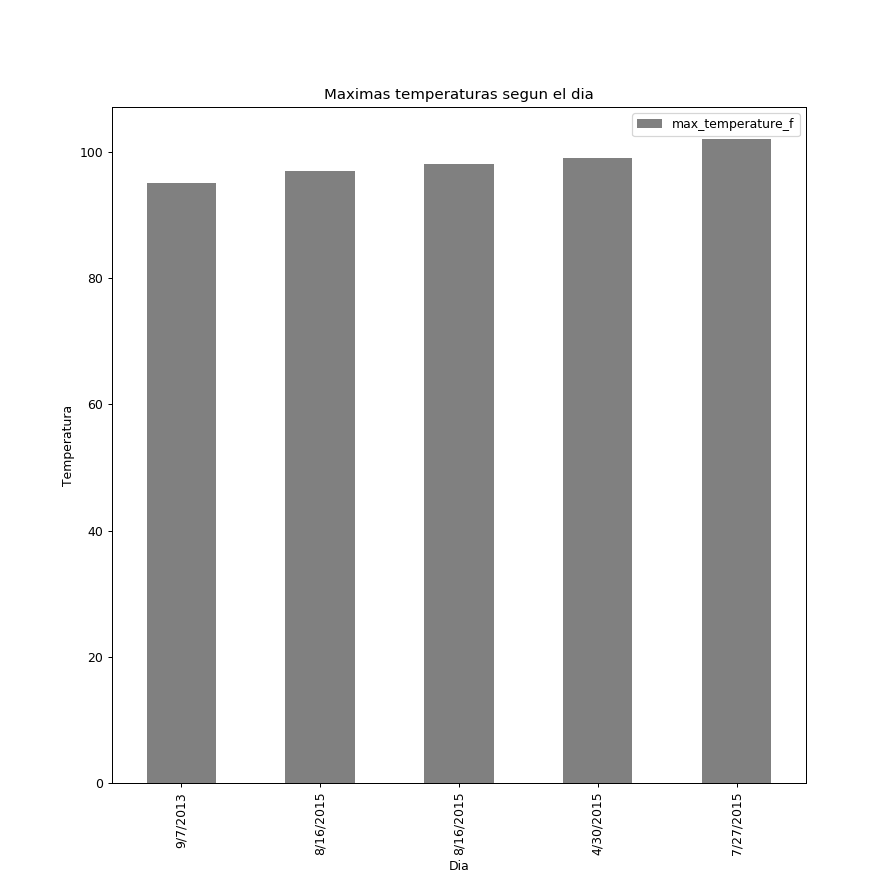

In [100]:
plt.rcParams['figure.figsize'] = (10, 10)

su = indexed_max_temp_weather_last5.plot(kind='bar',title='Maximas temperaturas segun el dia',color='grey')

plt.xlabel('Dia')
plt.ylabel('Temperatura')

# Dates with less temperature:

In [101]:
print(weather.groupby(['min_temperature_f'], sort=True)['date'].min())

min_temperature_f
25.0     12/9/2013
28.0    12/10/2013
29.0    12/10/2013
30.0      1/1/2015
31.0      1/2/2015
32.0      1/1/2015
33.0      1/1/2015
34.0      1/1/2014
35.0      1/1/2014
36.0      1/1/2014
37.0      1/1/2015
38.0      1/1/2015
39.0      1/1/2014
40.0     1/10/2014
41.0      1/1/2014
42.0     1/11/2015
43.0     1/11/2014
44.0     1/10/2014
45.0     1/13/2014
46.0     1/10/2015
47.0     1/10/2015
48.0     1/10/2014
49.0     1/18/2015
50.0     1/10/2015
51.0     1/27/2015
52.0     1/30/2014
53.0     1/28/2014
54.0     1/29/2014
55.0     1/27/2015
56.0     1/29/2014
57.0     10/1/2013
58.0    10/14/2014
59.0    10/14/2014
60.0    10/10/2014
61.0     10/4/2013
62.0    10/15/2014
63.0      6/9/2014
64.0     6/26/2015
65.0     7/19/2015
66.0     6/30/2015
68.0      6/8/2015
69.0     4/30/2014
71.0     8/15/2015
73.0     8/16/2015
75.0     4/16/2015
Name: date, dtype: object


In [102]:
weather.sort("min_temperature_f", ascending=True).head()

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
838,12/9/2013,51.0,38.0,25.0,23.0,20.0,13.0,75.0,48.0,21.0,...,10.0,10.0,9.0,3.0,10.0,0,0.0,None,149.0,95113
655,12/10/2013,52.0,38.0,28.0,32.0,26.0,20.0,74.0,62.0,45.0,...,10.0,10.0,14.0,1.0,14.0,0,0.0,None,328.0,94041
839,12/10/2013,53.0,41.0,28.0,29.0,25.0,22.0,78.0,55.0,32.0,...,10.0,10.0,7.0,1.0,8.0,0,1.0,None,139.0,95113
650,12/5/2013,51.0,38.0,28.0,26.0,22.0,20.0,72.0,55.0,32.0,...,10.0,10.0,14.0,1.0,28.0,0,0.0,None,341.0,94041
470,12/9/2013,51.0,40.0,29.0,25.0,19.0,13.0,64.0,45.0,26.0,...,10.0,10.0,18.0,4.0,23.0,0,0.0,None,5.0,94301


In [103]:
min_temp_weather = weather.groupby(['min_temperature_f'], sort=True)['date'].max()
min_temp_weather = min_temp_weather.reset_index()
min_temp_weather.head()

,min_temperature_f,date
0,25.0,12/9/2013
1,28.0,12/5/2013
2,29.0,12/9/2013
3,30.0,12/6/2013
4,31.0,12/8/2013


In [104]:
indexed_min_temp_weather = min_temp_weather.set_index(min_temp_weather['date'])
indexed_min_temp_weather.head()

,min_temperature_f,date
date,,
12/9/2013,25.0,12/9/2013
12/5/2013,28.0,12/5/2013
12/9/2013,29.0,12/9/2013
12/6/2013,30.0,12/6/2013
12/8/2013,31.0,12/8/2013


In [105]:
indexed_min_temp_weather_first5 = indexed_min_temp_weather.head(5)
indexed_min_temp_weather_first5.head()

,min_temperature_f,date
date,,
12/9/2013,25.0,12/9/2013
12/5/2013,28.0,12/5/2013
12/9/2013,29.0,12/9/2013
12/6/2013,30.0,12/6/2013
12/8/2013,31.0,12/8/2013


<IPython.core.display.Javascript object>


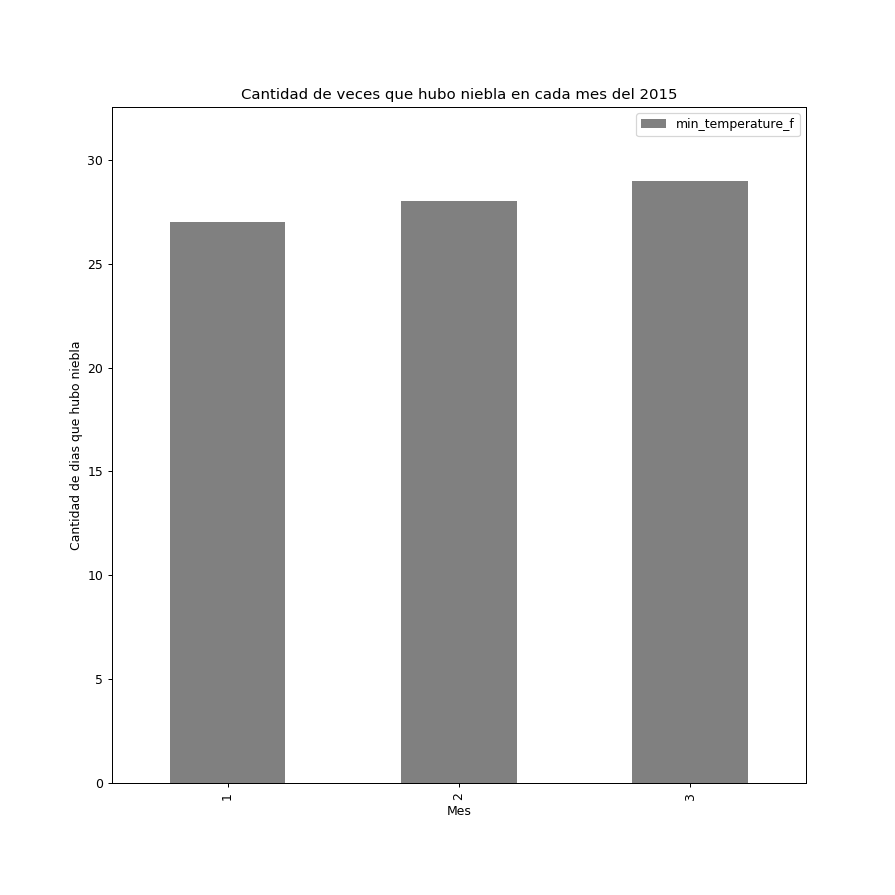

In [106]:
plt.rcParams['figure.figsize'] = (10, 10)

su = indexed_min_temp_weather_first5.plot(kind='bar',title='Minimas temperaturas segun su fecha',color='grey')

plt.xlabel('Fecha')
plt.ylabel('Temperatura')

In [107]:
weatherWithDates = weather
weatherWithDates['dates']= pd.to_datetime(weather['date'], format = '%m/%d/%Y')

weatherWithDates['anio'] = pd.DatetimeIndex(weather['date']).year
weatherWithDates['mes'] = pd.DatetimeIndex(weather['date']).month
weatherWithDates['dia'] = pd.DatetimeIndex(weather['date']).day
weatherWithDates['hora'] = pd.DatetimeIndex(weather['date']).hour
weatherWithDates['minutos'] = pd.DatetimeIndex(weather['date']).minute

print(weatherWithDates.describe())

       max_temperature_f  mean_temperature_f  min_temperature_f  \
count        3661.000000         3661.000000        3661.000000   
mean           70.580989           61.348812          51.947282   
std             8.385572            7.234397           7.441444   
min            44.000000           38.000000          25.000000   
25%            64.000000           56.000000          47.000000   
50%            70.000000           61.000000          53.000000   
75%            77.000000           67.000000          58.000000   
max           102.000000           84.000000          75.000000   

       max_dew_point_f  mean_dew_point_f  min_dew_point_f  max_humidity  \
count      3611.000000       3611.000000      3611.000000   3611.000000   
mean         53.149820         48.794794        44.306840     85.446968   
std           6.885449          7.822281         9.355432      9.226972   
min          20.000000         13.000000         2.000000     24.000000   
25%          49.00000

In [108]:
weatherWithDates.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,events,wind_dir_degrees,zip_code,dates,anio,mes,dia,hora,minutos
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,4.0,None,286.0,94107,2013-08-29,2013,8,29,0,0
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,2.0,None,291.0,94107,2013-08-30,2013,8,30,0,0
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,4.0,None,284.0,94107,2013-08-31,2013,8,31,0,0
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,4.0,None,284.0,94107,2013-09-01,2013,9,1,0,0
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,6.0,None,277.0,94107,2013-09-02,2013,9,2,0,0


# Cantidad de dias que llovio en cada mes en 2015

In [109]:
weather_2015 = weatherWithDates[weatherWithDates['anio'] == 2015]
weather_2015.head()
weather_2015['events'].unique()

array(['None', 'Fog', 'Fog-Rain', 'Rain', 'Rain-Thunderstorm'], dtype=object)

In [110]:
# Rain - 2015

weather_2015_rain = weather_2015[weather_2015['events'] == 'Rain']
weather_2015_rain.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,events,wind_dir_degrees,zip_code,dates,anio,mes,dia,hora,minutos
1998,2/6/2015,63.0,61.0,58.0,58.0,54.0,47.0,93.0,77.0,60.0,...,8.0,Rain,150.0,94107,2015-02-06,2015,2,6,0,0
1999,2/7/2015,64.0,59.0,54.0,61.0,57.0,52.0,93.0,89.0,84.0,...,6.0,Rain,182.0,94107,2015-02-07,2015,2,7,0,0
2000,2/8/2015,63.0,58.0,53.0,57.0,55.0,52.0,93.0,83.0,72.0,...,7.0,Rain,156.0,94107,2015-02-08,2015,2,8,0,0
2031,3/11/2015,65.0,58.0,51.0,56.0,51.0,43.0,100.0,72.0,44.0,...,5.0,Rain,308.0,94107,2015-03-11,2015,3,11,0,0
2042,3/22/2015,66.0,60.0,54.0,56.0,52.0,48.0,93.0,78.0,63.0,...,7.0,Rain,197.0,94107,2015-03-22,2015,3,22,0,0


In [111]:
weather_2015_rain.shape # Hay 76 dias de lluvia en todo el 2015

(76, 30)

In [112]:
weather_2015_rain_enero = weather_2015_rain[weather_2015_rain['mes'] == 1]

In [113]:
weather_2015_rain_enero.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,events,wind_dir_degrees,zip_code,dates,anio,mes,dia,hora,minutos
3060,1/4/2015,56.0,46.0,36.0,40.0,36.0,32.0,92.0,70.0,47.0,...,0.0,Rain,348.0,94041,2015-01-04,2015,1,4,0,0


In [114]:
weather_2015_rain_enero.shape #Llovio solo 1 dia en enero del 2015

(1, 30)

In [115]:
weather_2015_rain_febrero = weather_2015_rain[weather_2015_rain['mes'] == 2]
weather_2015_rain_febrero.shape #Llovieron 17 dias en Febrero del 2015

(17, 30)

In [116]:
weather_2015_rain_marzo = weather_2015_rain[weather_2015_rain['mes'] == 3]
weather_2015_rain_marzo.shape #Llovieron 15 dias en marzo 2015

(15, 30)

In [117]:
weather_2015_rain_abril = weather_2015_rain[weather_2015_rain['mes'] == 4]
weather_2015_rain_abril.shape #Llovieron 15 dias en abril 2015

(15, 30)

In [118]:
weather_2015_rain_mayo = weather_2015_rain[weather_2015_rain['mes'] == 5]
weather_2015_rain_mayo.shape #Llovieron 12 dias en mayo 2015

(12, 30)

In [119]:
weather_2015_rain_junio = weather_2015_rain[weather_2015_rain['mes'] == 6]
weather_2015_rain_junio.shape #Llovieron 5 dias en junio 2015

(5, 30)

In [120]:
weather_2015_rain_julio = weather_2015_rain[weather_2015_rain['mes'] == 7]
weather_2015_rain_julio.shape #Llovieron 8 dias en julio 2015

(8, 30)

In [121]:
weather_2015_rain_agosto = weather_2015_rain[weather_2015_rain['mes'] == 8]
weather_2015_rain_agosto.shape #Llovieron 3 dias en agosto 2015

(3, 30)

In [122]:
weather_2015_rain_septiembre = weather_2015_rain[weather_2015_rain['mes'] == 9]
weather_2015_rain_septiembre.shape #No llovio en septiembre 2015

(0, 30)

In [123]:
weather_2015_rain_octubre = weather_2015_rain[weather_2015_rain['mes'] == 10]
weather_2015_rain_octubre.shape #No llovio en octubre 2015

(0, 30)

In [124]:
weather_2015_rain_noviembre = weather_2015_rain[weather_2015_rain['mes'] == 11]
weather_2015_rain_noviembre.shape #No llovio en noviembre 2015

(0, 30)

In [125]:
weather_2015_rain_diciembre = weather_2015_rain[weather_2015_rain['mes'] == 12]
weather_2015_rain_diciembre.shape #No llovio en diciembre 2015

(0, 30)

In [126]:
weather_2015_months_rain = weather_2015_rain.groupby(by='mes')['mes'].count()

In [127]:
weather_2015_months_rain.head()

mes
1     1
2    17
3    15
4    15
5    12
Name: mes, dtype: int64

In [128]:
plt.rcParams['figure.figsize'] = (10, 10)

su = weather_2015_months_rain.plot(kind='bar',title='Cantidad de veces que llovio en cada mes del 2015',color='grey')

plt.ylabel('Cantidad de dias que llovio')
plt.xlabel('Mes')

In [129]:
# Rain Thunderstorm - 2015

weather_2015_rain_thunder = weather_2015[weather_2015['events'] == 'Rain-Thunderstorm']
weather_2015_rain_thunder.shape # Hubo 2 dias de tormenta en todo el 2015
weather_2015_rain_thunder.head() #Como son 2 no hace falta el head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,events,wind_dir_degrees,zip_code,dates,anio,mes,dia,hora,minutos
2020,2/28/2015,59.0,52.0,44.0,46.0,44.0,41.0,92.0,74.0,55.0,...,4.0,Rain-Thunderstorm,257.0,94107,2015-02-28,2015,2,28,0,0
2179,8/6/2015,72.0,65.0,58.0,58.0,57.0,54.0,93.0,77.0,61.0,...,5.0,Rain-Thunderstorm,309.0,94107,2015-08-06,2015,8,6,0,0


In [130]:
# Fog Rain - 2015

weather_2015_fog_rain = weather_2015[weather_2015['events'] == 'Fog-Rain']
weather_2015_fog_rain.shape # Hubo 3 dias de fog - rain en todo el 2015
weather_2015_fog_rain.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,events,wind_dir_degrees,zip_code,dates,anio,mes,dia,hora,minutos
1977,1/16/2015,57.0,50.0,43.0,52.0,48.0,43.0,96.0,84.0,72.0,...,6.0,Fog-Rain,349.0,94107,2015-01-16,2015,1,16,0,0
2122,6/10/2015,70.0,64.0,58.0,63.0,58.0,55.0,97.0,88.0,78.0,...,7.0,Fog-Rain,302.0,94107,2015-06-10,2015,6,10,0,0
3069,1/13/2015,64.0,53.0,41.0,48.0,42.0,37.0,100.0,70.0,39.0,...,1.0,Fog-Rain,9.0,94041,2015-01-13,2015,1,13,0,0


In [132]:
# Fog - 2015

weather_2015_fog = weather_2015[weather_2015['events'] == 'Fog']
weather_2015_fog.shape # Hubo 34 dias de fog en todo el 2015
weather_2015_fog.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,cloud_cover,events,wind_dir_degrees,zip_code,dates,anio,mes,dia,hora,minutos
1971,1/10/2015,60.0,54.0,47.0,52.0,49.0,45.0,93.0,83.0,72.0,...,6.0,Fog,280.0,94107,2015-01-10,2015,1,10,0,0
1972,1/11/2015,57.0,50.0,42.0,50.0,46.0,42.0,96.0,87.0,77.0,...,5.0,Fog,143.0,94107,2015-01-11,2015,1,11,0,0
1973,1/12/2015,57.0,49.0,41.0,50.0,46.0,41.0,96.0,87.0,77.0,...,3.0,Fog,246.0,94107,2015-01-12,2015,1,12,0,0
1974,1/13/2015,66.0,55.0,43.0,48.0,43.0,37.0,100.0,69.0,37.0,...,2.0,Fog,135.0,94107,2015-01-13,2015,1,13,0,0
1976,1/15/2015,59.0,50.0,40.0,49.0,45.0,39.0,100.0,84.0,67.0,...,5.0,Fog,287.0,94107,2015-01-15,2015,1,15,0,0


In [133]:
weather_2015_months_fog = weather_2015_fog.groupby(by='mes')['mes'].count()
weather_2015_months_fog.head()

mes
1    27
2     4
3     3
Name: mes, dtype: int64

In [134]:
plt.rcParams['figure.figsize'] = (10, 10)

su = weather_2015_months_fog.plot(kind='bar',title='Cantidad de veces que hubo niebla en cada mes del 2015',color='grey')

plt.ylabel('Cantidad de dias que hubo niebla')
plt.xlabel('Mes')

## Cantidad de eventos climáticos registrados en cada ciudad

<IPython.core.display.Javascript object>


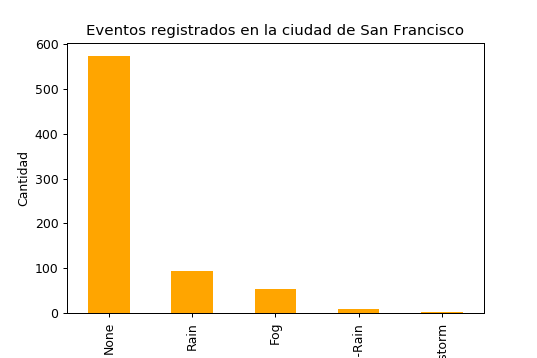

In [62]:
weatherSF = weather.loc[weather.zip_code == 94107,:]

%matplotlib notebook
sub_weatherSF = weatherSF['events'].value_counts()
sub_plot=sub_weatherSF.plot(kind='bar',title='Eventos registrados en la ciudad de San Francisco',color='orange')
sub_plot.set_xlabel('Evento')
sub_plot.set_ylabel('Cantidad')

<IPython.core.display.Javascript object>


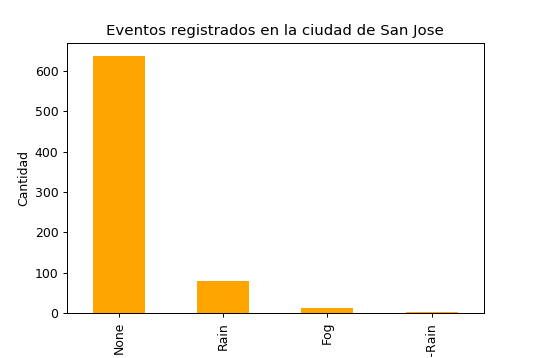

In [35]:
weatherSJ = weather.loc[weather.zip_code == 95113,:]

%matplotlib notebook
sub_weatherSJ = weatherSJ['events'].value_counts()
sub_plot=sub_weatherSJ.plot(kind='bar',title='Eventos registrados en la ciudad de San Jose',color='orange')
sub_plot.set_xlabel('Evento')
sub_plot.set_ylabel('Cantidad')

<IPython.core.display.Javascript object>


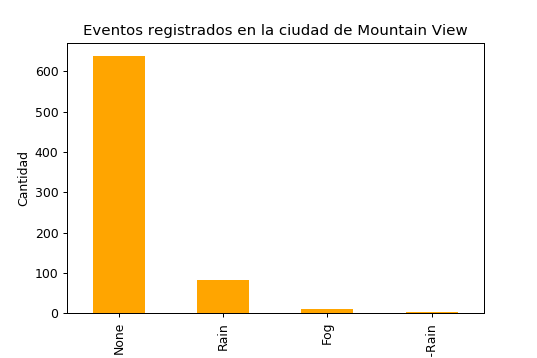

In [36]:
weatherMV = weather.loc[weather.zip_code == 94041,:]

%matplotlib notebook
sub_weatherMV = weatherMV['events'].value_counts()
sub_plot=sub_weatherMV.plot(kind='bar',title='Eventos registrados en la ciudad de Mountain View',color='orange')
sub_plot.set_xlabel('Evento')
sub_plot.set_ylabel('Cantidad')

<IPython.core.display.Javascript object>


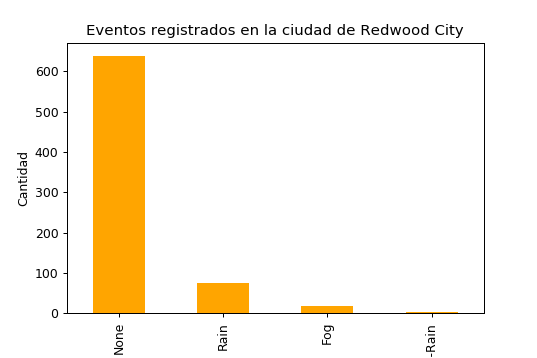

In [37]:
weatherRC = weather.loc[weather.zip_code == 94063,:]

%matplotlib notebook
sub_weatherRC = weatherRC['events'].value_counts()
sub_plot=sub_weatherRC.plot(kind='bar',title='Eventos registrados en la ciudad de Redwood City',color='orange')
sub_plot.set_xlabel('Evento')
sub_plot.set_ylabel('Cantidad')

<IPython.core.display.Javascript object>


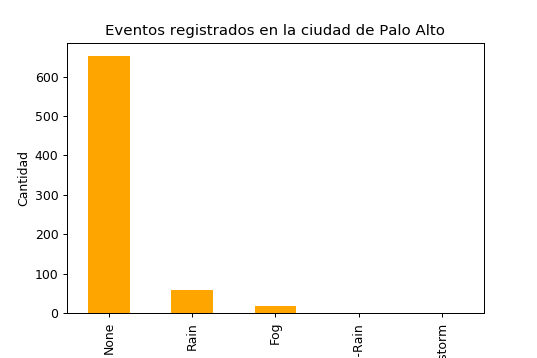

In [38]:
weatherPA = weather.loc[weather.zip_code == 94301,:]

%matplotlib notebook
sub_weatherPA = weatherPA['events'].value_counts()
sub_plot=sub_weatherPA.plot(kind='bar',title='Eventos registrados en la ciudad de Palo Alto',color='orange')
sub_plot.set_xlabel('Evento')
sub_plot.set_ylabel('Cantidad')

In [39]:
weather.events.value_counts()

None                 3143
Rain                  390
Fog                   112
Fog-Rain               17
Rain-Thunderstorm       3
Name: events, dtype: int64

# Trips y Weather

## Relacion entre duracion promedio en segundos y temperatura promedio en Fahrenheit

In [63]:
weather[:2]
weather.isnull().sum()
weather.zip_code.unique()

array([94107, 94063, 94301, 94041, 95113])

In [64]:
# Para filtrar aquellos viajes que duran menos de 24 hs (menos de 86400 segundos)
trips_menos_1 = trips.loc[trips.duration < 86400,:]

trips_menos_1.tail(12)


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,month,day,hour,minutes,yearE,monthE,dayE,hourE,minutesE,duration_minutes
669947,432966,17396,2014-09-01 07:37:00,Mountain View City Hall,27,2014-09-01 12:27:00,Mountain View City Hall,27,140,Customer,...,9,0,7,37,2014,9,1,12,27,289.933333
669948,432965,17297,2014-09-01 07:37:00,Mountain View City Hall,27,2014-09-01 12:25:00,Mountain View City Hall,27,57,Customer,...,9,0,7,37,2014,9,1,12,25,288.283333
669949,432964,169,2014-09-01 07:32:00,Embarcadero at Bryant,54,2014-09-01 07:35:00,Embarcadero at Folsom,51,496,Subscriber,...,9,0,7,32,2014,9,1,7,35,2.816667
669950,432960,5667,2014-09-01 07:03:00,Japantown,9,2014-09-01 08:38:00,Japantown,9,56,Customer,...,9,0,7,3,2014,9,1,8,38,94.450000
669951,432959,441,2014-09-01 06:58:00,Market at 10th,67,2014-09-01 07:05:00,Market at Sansome,77,617,Subscriber,...,9,0,6,58,2014,9,1,7,5,7.350000
669952,432957,398,2014-09-01 05:54:00,Yerba Buena Center of the Arts (3rd @ Howard),68,2014-09-01 06:00:00,Steuart at Market,74,561,Subscriber,...,9,0,5,54,2014,9,1,6,0,6.633333
669953,432952,240,2014-09-01 04:59:00,South Van Ness at Market,66,2014-09-01 05:03:00,Civic Center BART (7th at Market),72,292,Subscriber,...,9,0,4,59,2014,9,1,5,3,4.000000
669954,432951,619,2014-09-01 04:21:00,Powell Street BART,39,2014-09-01 04:32:00,Townsend at 7th,65,335,Subscriber,...,9,0,4,21,2014,9,1,4,32,10.316667
669955,432950,6712,2014-09-01 03:16:00,Harry Bridges Plaza (Ferry Building),50,2014-09-01 05:08:00,San Francisco Caltrain (Townsend at 4th),70,259,Customer,...,9,0,3,16,2014,9,1,5,8,111.866667
669956,432949,538,2014-09-01 00:05:00,South Van Ness at Market,66,2014-09-01 00:14:00,5th at Howard,57,466,Customer,...,9,0,0,5,2014,9,1,0,14,8.966667


In [65]:
# Para separar por anio , mes y dia
trips_menos_1['year'] = pd.DatetimeIndex(trips_menos_1['start_date']).year
trips_menos_1['month'] = pd.DatetimeIndex(trips_menos_1['start_date']).month
trips_menos_1['day'] = pd.DatetimeIndex(trips_menos_1['start_date']).day

trips_menos_1.head(15)


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,month,day,hour,minutes,yearE,monthE,dayE,hourE,minutesE,duration_minutes
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,...,8,29,14,13,2013,8,29,14,14,1.050000
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,...,8,29,14,42,2013,8,29,14,43,1.166667
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,...,8,29,10,16,2013,8,29,10,17,1.183333
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,...,8,29,11,29,2013,8,29,11,30,1.283333
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,...,8,29,12,2,2013,8,29,12,4,1.383333
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,...,8,29,18,54,2013,8,29,18,56,1.716667
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,...,8,29,13,25,2013,8,29,13,27,1.816667
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,...,8,29,14,2,2013,8,29,14,4,1.850000
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,...,8,29,17,1,2013,8,29,17,3,1.883333
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,...,8,29,11,33,2013,8,29,11,35,1.900000


In [66]:
weather.date = pd.to_datetime(weather.date, format='%m/%d/%Y')

# Para separar por anio , mes y dia
weather['year'] = pd.DatetimeIndex(weather['date']).year
weather['month'] = pd.DatetimeIndex(weather['date']).month
weather['day'] = pd.DatetimeIndex(weather['date']).day

In [67]:
#Veo que zipcode tiene menor cantidad de nulls porque para cada fecha hay un registro por zipcode
for zip_code in weather.zip_code.unique():
    print zip_code
    print (weather[weather.zip_code == zip_code].isnull().sum())
    print ()

94107
date                               0
max_temperature_f                  0
mean_temperature_f                 0
min_temperature_f                  0
max_dew_point_f                    0
mean_dew_point_f                   0
min_dew_point_f                    0
max_humidity                       0
mean_humidity                      0
min_humidity                       0
max_sea_level_pressure_inches      0
mean_sea_level_pressure_inches     0
min_sea_level_pressure_inches      0
max_visibility_miles               0
mean_visibility_miles              0
min_visibility_miles               0
max_wind_Speed_mph                 0
mean_wind_speed_mph                0
max_gust_speed_mph                13
precipitation_inches               0
cloud_cover                        0
events                             0
wind_dir_degrees                   0
zip_code                           0
year                               0
month                              0
day                             

In [68]:
# Me quedo con el zip code 94107 pues es el que presenta menos cantidad de valores nulos 
weather_94107 = weather.loc[weather['zip_code'] == 94107 , :]

weather_94107.head(10)

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code,year,month,day
0,2013-08-29,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,11.0,28.0,0,4.0,None,286.0,94107,2013,8,29
1,2013-08-30,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,13.0,35.0,0,2.0,None,291.0,94107,2013,8,30
2,2013-08-31,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,15.0,31.0,0,4.0,None,284.0,94107,2013,8,31
3,2013-09-01,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,13.0,29.0,0,4.0,None,284.0,94107,2013,9,1
4,2013-09-02,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,12.0,30.0,0,6.0,None,277.0,94107,2013,9,2
5,2013-09-03,73.0,67.0,60.0,59.0,56.0,51.0,84.0,65.0,46.0,...,15.0,31.0,0,2.0,None,276.0,94107,2013,9,3
6,2013-09-04,74.0,68.0,61.0,59.0,57.0,56.0,90.0,72.0,53.0,...,19.0,35.0,0,4.0,None,269.0,94107,2013,9,4
7,2013-09-05,72.0,66.0,60.0,57.0,56.0,54.0,90.0,74.0,57.0,...,21.0,37.0,0,3.0,None,270.0,94107,2013,9,5
8,2013-09-06,85.0,71.0,56.0,57.0,51.0,45.0,86.0,58.0,29.0,...,8.0,28.0,0,0.0,None,287.0,94107,2013,9,6
9,2013-09-07,88.0,73.0,58.0,64.0,54.0,46.0,86.0,59.0,31.0,...,8.0,25.0,0,1.0,None,305.0,94107,2013,9,7


In [69]:
trips_weather_94107 = pd.merge(trips_menos_1,weather_94107,how='left',on=['year','month','day'])

trips_weather_94107.head(20)


,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code_y
0,4576,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107
1,4607,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107
2,4130,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107
3,4251,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107
4,4299,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107
5,4927,103,2013-08-29 18:54:00,Golden Gate at Polk,59,2013-08-29 18:56:00,Golden Gate at Polk,59,527,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107
6,4500,109,2013-08-29 13:25:00,Santa Clara at Almaden,4,2013-08-29 13:27:00,Adobe on Almaden,5,679,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107
7,4563,111,2013-08-29 14:02:00,San Salvador at 1st,8,2013-08-29 14:04:00,San Salvador at 1st,8,687,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107
8,4760,113,2013-08-29 17:01:00,South Van Ness at Market,66,2013-08-29 17:03:00,South Van Ness at Market,66,553,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107
9,4258,114,2013-08-29 11:33:00,San Jose City Hall,10,2013-08-29 11:35:00,MLK Library,11,107,Subscriber,...,10.0,10.0,23.0,11.0,28.0,0,4.0,None,286.0,94107


<IPython.core.display.Javascript object>


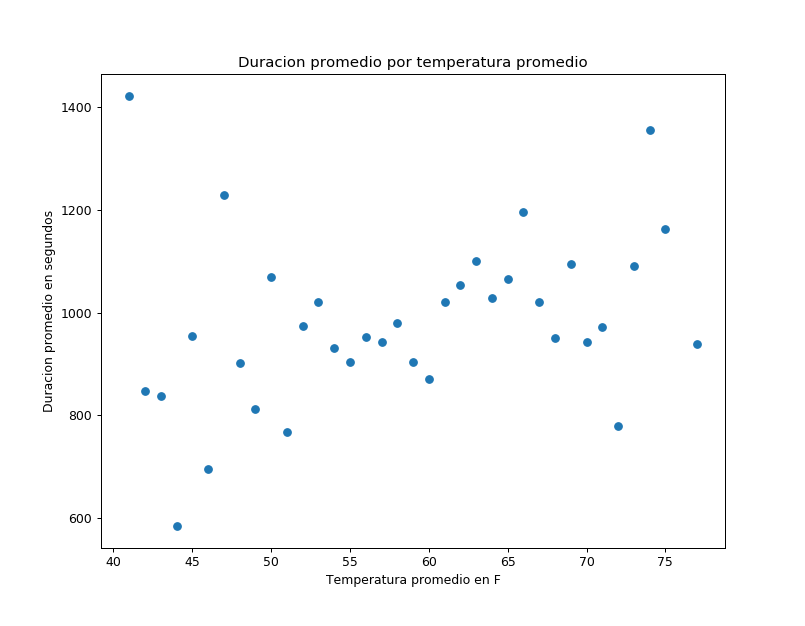

In [137]:
# Convierto la serie obtenida en un Dataframe para el plot
aux_df = trips_weather_94107.groupby('mean_temperature_f')['duration'].mean().to_frame()

aux_df.reset_index(inplace=True)
aux_df.columns = ['mean_temperature_f','mean_duration']
%matplotlib notebook
plt.figure(figsize = [9,7])


sc1 = plt.scatter(aux_df['mean_temperature_f'],aux_df['mean_duration'],alpha =1)
plt.title('Duracion promedio por temperatura promedio')
plt.ylabel('Duracion promedio en segundos')
plt.xlabel('Temperatura promedio en F')

## Correlacion entre la velocidad promedio del viento y la duracion del trip mas popular 
## ¿esta bien usar este plot??

<IPython.core.display.Javascript object>


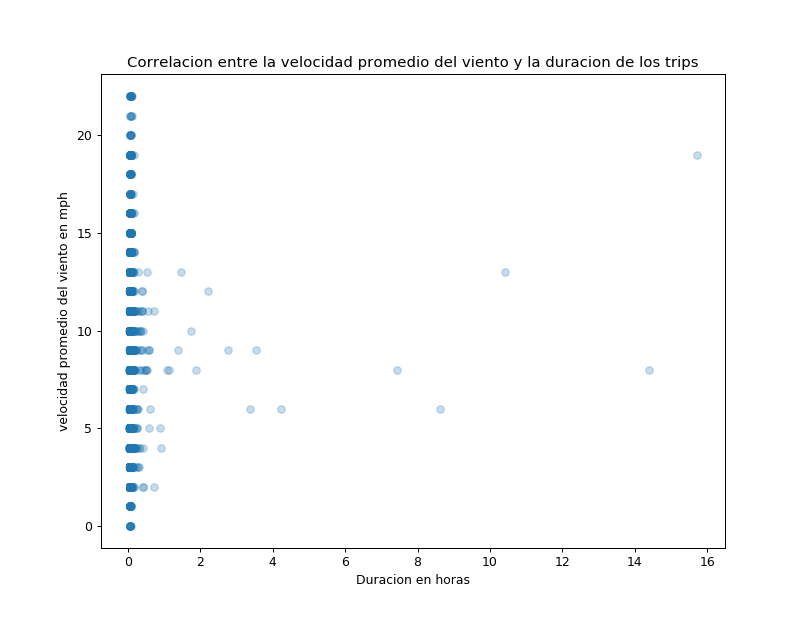

In [141]:
%matplotlib notebook
plt.figure(figsize = [9,7])
trips_weather_94107['duration_horas']=trips_weather_94107['duration']/3600


trip6965 = trips_weather_94107.loc[(trips_weather_94107['start_station_id'] == 69) & (trips_weather_94107['end_station_id'] == 65), :]

sc = plt.scatter(trip6965['duration_horas'],trip6965['mean_wind_speed_mph'],alpha =0.25)
plt.title('Correlacion entre la velocidad promedio del viento y la duracion de los trips')
plt.xlabel('Duracion en horas')
plt.ylabel('velocidad promedio del viento en mph')

## Correlacion entre la velocidad maxima de las rafagas de viento y la duracion en horas para el trip mas popular

## ¿esta bien usar este plot?????

<IPython.core.display.Javascript object>


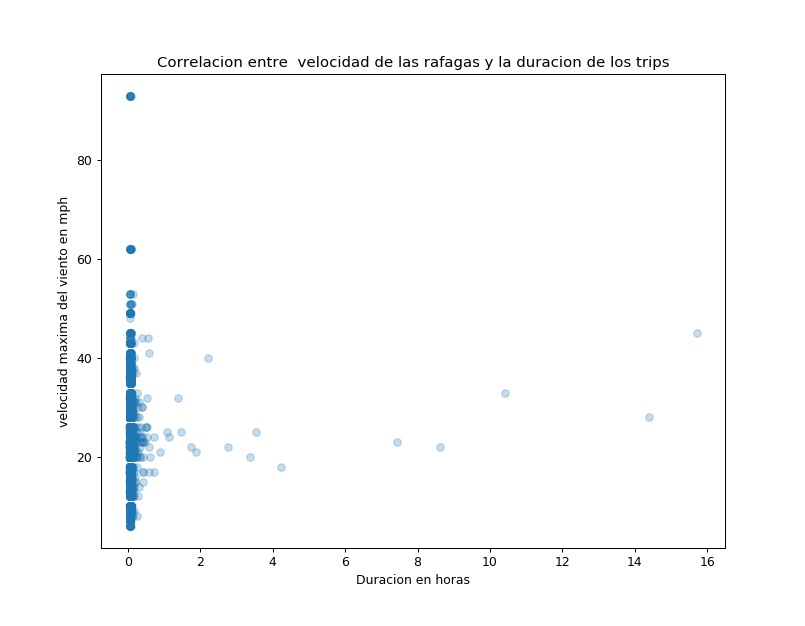

In [142]:
%matplotlib notebook
plt.figure(figsize = [9,7])
sc1 = plt.scatter(trip6965['duration_horas'],trip6965['max_gust_speed_mph'],alpha =0.25)
plt.title('Correlacion entre  velocidad de las rafagas y la duracion de los trips')
plt.xlabel('Duracion en horas')
plt.ylabel('velocidad maxima del viento en mph')

## Correlación entre las distintas variables del clima 

<IPython.core.display.Javascript object>


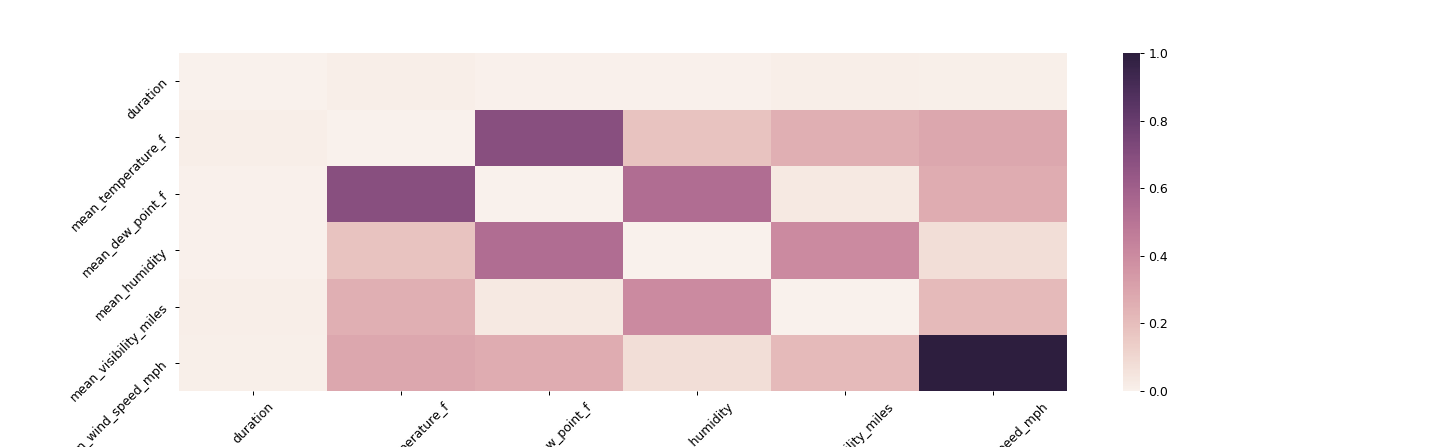

In [74]:
## Para los viajes que duran menos de un dia, me sigo quedando con el zip_code 94107
# analizo la relacion que existe entre las diferentes variables, mientras más oscuro, más 
# fuerte es la relación

fig, ax = plt.subplots(figsize=(16,5));        # Sample figsize in inches

cor = trips_weather_94107.loc[:,['duration','mean_temperature_f','mean_dew_point_f','mean_humidity','mean_visibility_miles','mean_wind_speed_mph']]\
        .corr().abs()
cor.values[[np.arange(5)]*2] = 0
g=sns.heatmap(cor);
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.set_yticklabels(g.get_yticklabels(), rotation = 45)

